# DA_Fall21_HW_3 Support Vector Machine and Decision Trees

# Due on 11/22 23:59 pm

# Chihoon Kim (23694627)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [2]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load it from the API
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# make sure there is no missing values
orig_df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
had_affair         0
dtype: int64

In [3]:
# separate the features into categorical vs numerical
numerical_features = ['age', 'yrs_married', 'children']
categorical_features = ['rate_marriage', 'religious', 'educ', 'occupation', 'occupation_husb']
# collect all numerical features with the target variables first
numerical_df = orig_df[numerical_features + ['had_affair']]
numerical_df.head()

,age,yrs_married,children,had_affair
0,32.0,9.0,3.0,1
1,27.0,13.0,3.0,1
2,22.0,2.5,0.0,1
3,37.0,16.5,4.0,1
4,27.0,9.0,1.0,1


In [4]:
# create corresponding dummies variables
rate_marriage = pd.get_dummies(orig_df['rate_marriage'],drop_first=True)
religious = pd.get_dummies(orig_df['religious'],drop_first=True)
edu = pd.get_dummies(orig_df['educ'],drop_first=True)
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
husb_occ = pd.get_dummies(orig_df['occupation_husb'],drop_first=True)

In [5]:
rate_marriage.head()

,2.0,3.0,4.0,5.0
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1


In [6]:
religious.head()

,2.0,3.0,4.0
0,0,1,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


In [7]:
# better to create a header to avoid same name
rate_marriage.columns = ['rate1','rate2','rate3','rate4']
rate_marriage

,rate1,rate2,rate3,rate4
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
6466,0,0,0,1
6467,0,0,1,0
6468,0,0,0,1
6469,0,0,0,1


In [8]:
religious.columns = ['re1','rel2','rel3']
religious.head()

,re1,rel2,rel3
0,0,1,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


***Now we can concatnate the numerical features with rate_marriage and religious variabes***

In [9]:
df = pd.concat([numerical_df, rate_marriage, religious], axis=1)
df.head()

,age,yrs_married,children,had_affair,rate1,rate2,rate3,rate4,re1,rel2,rel3
0,32.0,9.0,3.0,1,0,1,0,0,0,1,0
1,27.0,13.0,3.0,1,0,1,0,0,0,0,0
2,22.0,2.5,0.0,1,0,0,1,0,0,0,0
3,37.0,16.5,4.0,1,0,0,1,0,0,1,0
4,27.0,9.0,1.0,1,0,0,0,1,0,0,0


### The goal of this homework is to practice building Support Vector Machine and Decision Tree Models.

### Part A: Support Vector Machine

***Follow the standard way of building a model and in particular,***
1. Build a classification model using SVC using Linear Kernel without specifying the c-parameter using the above provided data frame
2. Try different values of C-parameters (at least one small and one bigger value)
3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2 with default value for C-parameter
4. Answer the question out of all the models above, what is the best choice for the kernel, C and gamma parameters
Explain briefly the effect of using different parameter values


***Type your answers and code here***

In [11]:
from sklearn import svm
from sklearn.model_selection import train_test_split
model = svm.SVC(kernel = 'linear')
x_train, x_test, y_train, y_test = train_test_split(df.drop('had_affair',axis=1),
                                                    df['had_affair'], test_size=0.20,
                                                    random_state=101)

model.fit(x_train, y_train)

SVC(kernel='linear')

In [11]:
from sklearn.metrics import classification_report, accuracy_score
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       850
           1       0.55      0.39      0.46       424

    accuracy                           0.69      1274
   macro avg       0.64      0.62      0.62      1274
weighted avg       0.67      0.69      0.68      1274

0.6907378335949764


In [12]:
#C = 1 and 100
#Model with small C
model_smallC = svm.SVC(kernel = 'linear', C = 1)
model_smallC.fit(x_train, y_train)
predictions = model_smallC.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       850
           1       0.55      0.39      0.46       424

    accuracy                           0.69      1274
   macro avg       0.64      0.62      0.62      1274
weighted avg       0.67      0.69      0.68      1274

0.6907378335949764


In [13]:
#Model with large C
model_largeC = svm.SVC(kernel = 'linear', C = 100)
model_largeC.fit(x_train, y_train)
predictions = model_largeC.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       850
           1       0.55      0.39      0.46       424

    accuracy                           0.69      1274
   macro avg       0.64      0.62      0.62      1274
weighted avg       0.67      0.69      0.68      1274

0.6907378335949764


In [14]:
#Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2 
# with default value for C-parameter

In [15]:
model_3_1 = svm.SVC(kernel = 'rbf', gamma = 2**-5)
model_3_1.fit(x_train, y_train)
predictions = model_3_1.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       850
           1       0.61      0.35      0.45       424

    accuracy                           0.71      1274
   macro avg       0.67      0.62      0.62      1274
weighted avg       0.69      0.71      0.68      1274

0.7103610675039247


In [16]:
model_3_2 = svm.SVC(kernel = 'rbf', gamma = 0.1)
model_3_2.fit(x_train, y_train)
predictions = model_3_2.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       850
           1       0.58      0.36      0.44       424

    accuracy                           0.70      1274
   macro avg       0.65      0.61      0.62      1274
weighted avg       0.68      0.70      0.68      1274

0.6985871271585558


In [17]:
model_3_3 = svm.SVC(kernel = 'rbf', gamma = 1)
model_3_3.fit(x_train, y_train)
predictions = model_3_3.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       850
           1       0.55      0.38      0.45       424

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.62      1274
weighted avg       0.67      0.69      0.67      1274

0.6883830455259027


In [18]:
model_3_4 = svm.SVC(kernel = 'rbf', gamma = 2)
model_3_4.fit(x_train, y_train)
predictions = model_3_4.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       850
           1       0.53      0.32      0.40       424

    accuracy                           0.68      1274
   macro avg       0.62      0.59      0.59      1274
weighted avg       0.66      0.68      0.66      1274

0.6797488226059655


## Answer the question out of all the models above, what is the best choice for the kernel, C and gamma parameters Explain briefly the effect of using different parameter values

Answer: Higher value of Gamma parameter leads to the lower accuracy score. The model that used bigger C value and the model that used smaller C value have same result. 

### Part B: Now we will try to fit the same dataset with Decision Trees

***Follow the standard way of building a model and in particular,***
1. Build a Decision Tree Classifier
2. Try using different max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 6 different models
3. Answer the question of what is your observation from step 2. Does the choice of the criterion important or not. What about max_depth? and What is the best choice of max_depth and criterion
4. Pick 3 models with max_depth = 2, 3, 4 and. You can pick which ever criterions you want and visualize the 3 trees.
5. Build a Random Forest Classifier with, say 100 trees. Comment on its model performance when compared with the individual trees models above


***Type your code and answers here***

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[723 127]
 [279 145]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       850
           1       0.53      0.34      0.42       424

    accuracy                           0.68      1274
   macro avg       0.63      0.60      0.60      1274
weighted avg       0.66      0.68      0.66      1274

0.6813186813186813


In [20]:
# Model 1 using Gini, Max_Depth = 2
model_g_d2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
model_g_d2.fit(x_train, y_train)

predictions = model_g_d2.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[714 136]
 [258 166]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       850
           1       0.55      0.39      0.46       424

    accuracy                           0.69      1274
   macro avg       0.64      0.62      0.62      1274
weighted avg       0.67      0.69      0.68      1274

0.6907378335949764


In [21]:
# Model 2 using Gini, Max_Depth = 3
model_g_d3 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model_g_d3.fit(x_train, y_train)

predictions = model_g_d3.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[765  85]
 [290 134]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       850
           1       0.61      0.32      0.42       424

    accuracy                           0.71      1274
   macro avg       0.67      0.61      0.61      1274
weighted avg       0.69      0.71      0.67      1274

0.7056514913657771


In [22]:
# Model 3 using Gini, Max_Depth = 4
model_g_d4 = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
model_g_d4.fit(x_train, y_train)

predictions = model_g_d4.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[721 129]
 [260 164]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       850
           1       0.56      0.39      0.46       424

    accuracy                           0.69      1274
   macro avg       0.65      0.62      0.62      1274
weighted avg       0.68      0.69      0.68      1274

0.6946624803767661


In [23]:
# Model 4 using Entropy, Max_Depth = 2
model_e_d2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
model_e_d2.fit(x_train, y_train)

predictions = model_e_d2.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[714 136]
 [258 166]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       850
           1       0.55      0.39      0.46       424

    accuracy                           0.69      1274
   macro avg       0.64      0.62      0.62      1274
weighted avg       0.67      0.69      0.68      1274

0.6907378335949764


In [24]:
# Model 5 using Entropy, Max_Depth = 3
model_e_d3 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model_e_d3.fit(x_train, y_train)

predictions = model_e_d3.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[765  85]
 [290 134]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       850
           1       0.61      0.32      0.42       424

    accuracy                           0.71      1274
   macro avg       0.67      0.61      0.61      1274
weighted avg       0.69      0.71      0.67      1274

0.7056514913657771


In [25]:
# Model 6 using Entropy, Max_Depth = 4
model_e_d4 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
model_e_d4.fit(x_train, y_train)

predictions = model_e_d4.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[721 129]
 [260 164]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       850
           1       0.56      0.39      0.46       424

    accuracy                           0.69      1274
   macro avg       0.65      0.62      0.62      1274
weighted avg       0.68      0.69      0.68      1274

0.6946624803767661


### Answer : The choice of the criterion does not affect the overall results of Q6's models. Only when the max_depth parameter was changed, the result was different. The best choice for the model performance was the model that used max_depth = 2 with the one of criterions, gini or entropy.

In [26]:
from sklearn import tree
from matplotlib.pyplot import figure

model1 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model1.fit(x_train, y_train)
model2 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model2.fit(x_train, y_train)
model3 = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model3.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

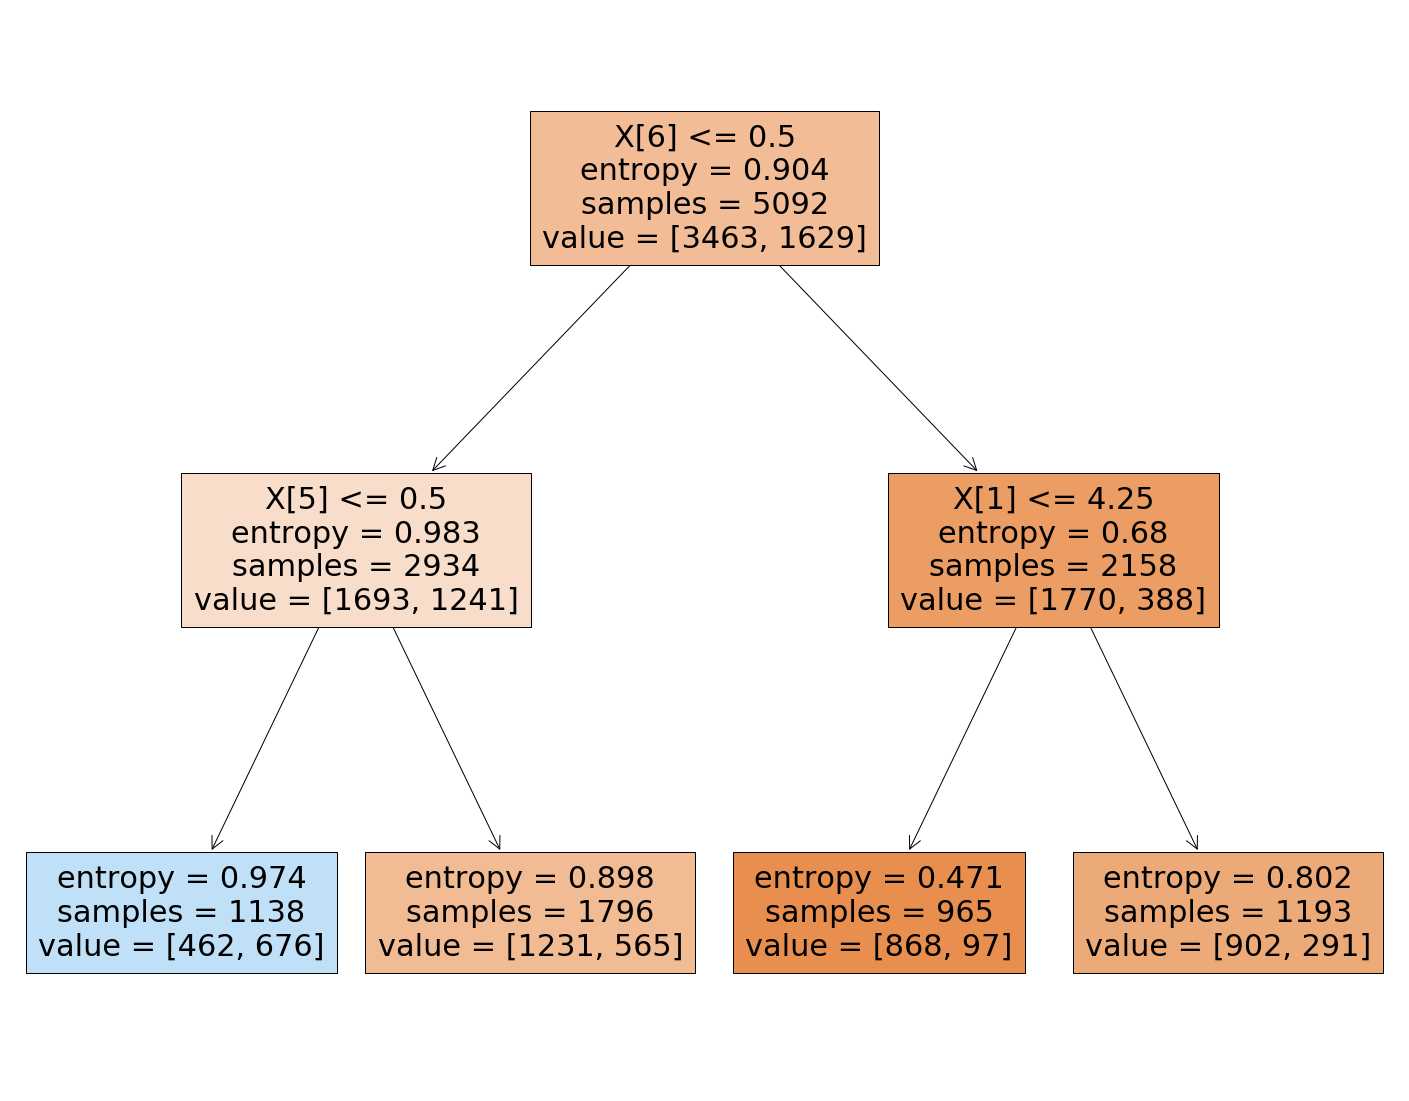

In [27]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model1,filled=True)


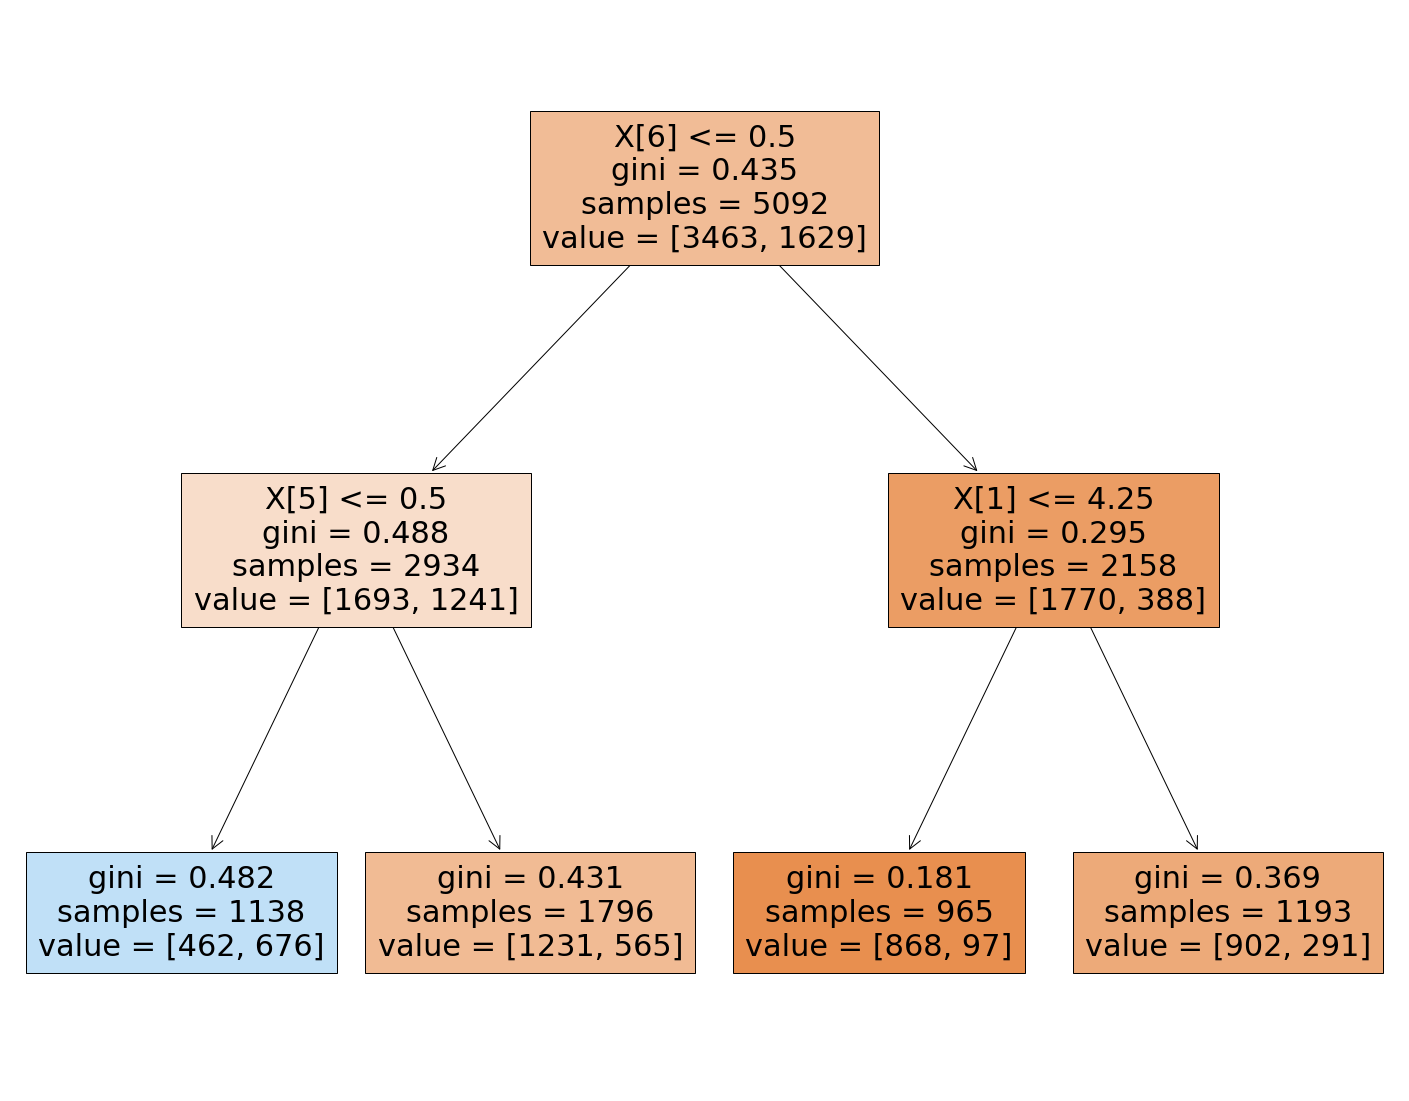

In [28]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model2,filled=True)

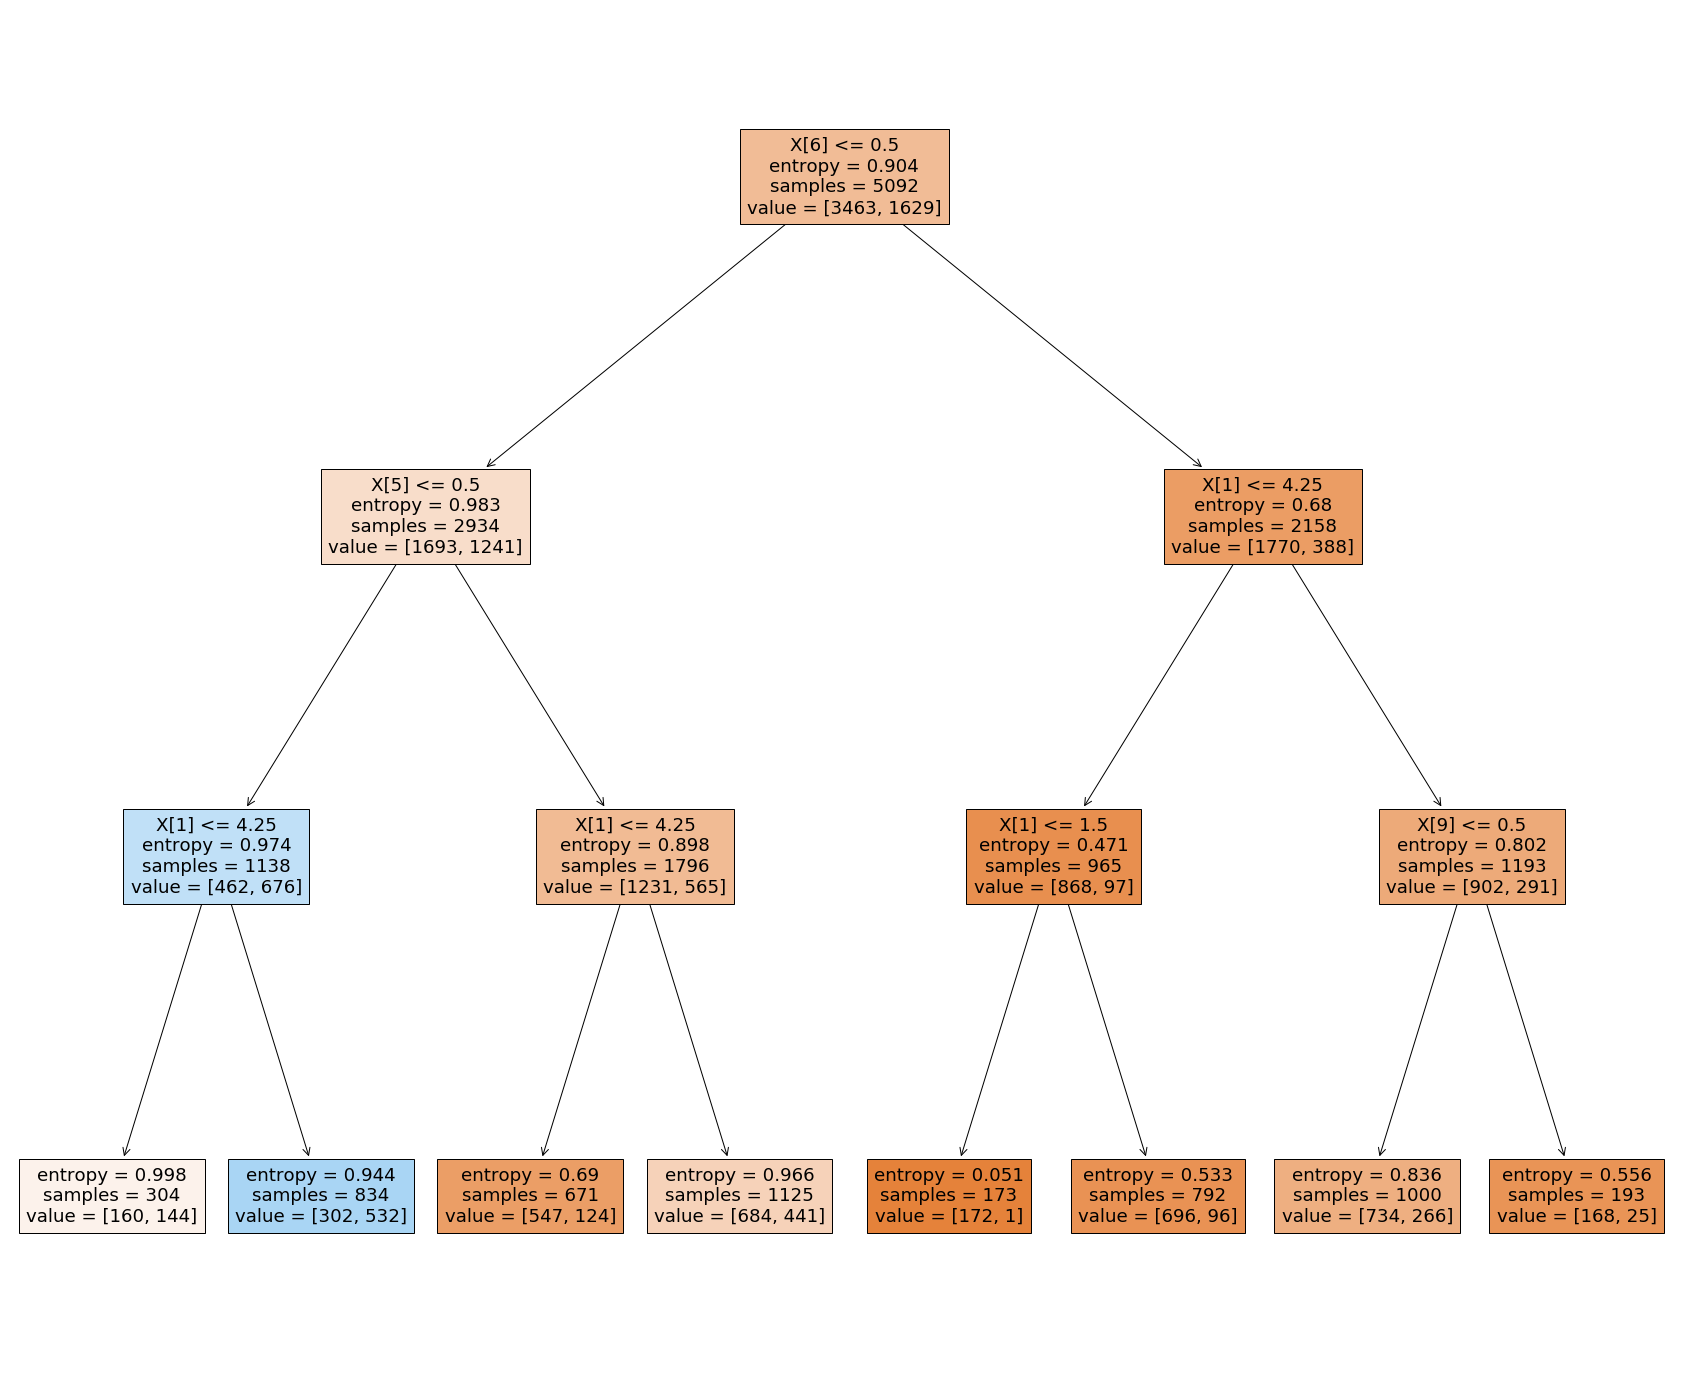

In [29]:
fig = plt.figure(figsize=(30,25))
_ = tree.plot_tree(model3,filled=True)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       850
           1       0.54      0.40      0.46       424

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.62      1274
weighted avg       0.67      0.69      0.67      1274

0.6860282574568289


There is no huge difference on prediction result between the decision tree what we did and this random forest. 


### Part C: Now finally create a dataframe including all other categorical variable and build decision tree model

In [13]:
# Type your code here, fill in the missing code here

edu.columns = ['edu1','edu2','edu3','edu4','edu5' ]
occ.columns = ['occ2','occ3','occ4','occ5','occ6']
husb_occ.columns = ['hocc2','hocc3','hocc4','hocc5','hocc6']

df2 = pd.concat([df, edu, occ, husb_occ], axis =1)
df2.head()




,age,yrs_married,children,had_affair,rate1,rate2,rate3,rate4,re1,rel2,...,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,32.0,9.0,3.0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,27.0,13.0,3.0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,22.0,2.5,0.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,37.0,16.5,4.0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,27.0,9.0,1.0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [14]:
df2.columns

Index(['age', 'yrs_married', 'children', 'had_affair', 'rate1', 'rate2',
       'rate3', 'rate4', 're1', 'rel2', 'rel3', 'edu1', 'edu2', 'edu3', 'edu4',
       'edu5', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6', 'hocc2', 'hocc3',
       'hocc4', 'hocc5', 'hocc6'],
      dtype='object')

***Use the same model as in Part B step 1 with this new dataframe. Comment on whether the additional variables help the model performance or not***

***Type your code and answers here***

In [15]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(df2.drop('had_affair',axis=1),
                                                    df2['had_affair'], test_size=0.20,
                                                    random_state=101)

In [16]:
model = DecisionTreeClassifier()
model.fit(x_train2, y_train2)
predictions2 = model.predict(x_test2)
print(confusion_matrix(y_test2,predictions2))
print(classification_report(y_test2,predictions2))
print(accuracy_score(y_test2, predictions2))

[[658 192]
 [231 193]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       850
           1       0.50      0.46      0.48       424

    accuracy                           0.67      1274
   macro avg       0.62      0.61      0.62      1274
weighted avg       0.66      0.67      0.66      1274

0.6679748822605965


The performance of the model slightly goes down rather than the previous model.